# Centrality Measures

Natalie Mollaghan
Violet Stoyanova
Sudhan Maharjan

## Assignment:

Centrality measures can be used to predict (positive or negative) outcomes for a node.
Your task in this week’s assignment is to identify an interesting set of network data that is available on the web (either through web scraping or web APIs) that could be used for analyzing and comparing centrality measures across nodes. As an additional constraint, there should be at least one categorical variable available for each node (such as “Male” or “Female”; “Republican”, “Democrat,” or “Undecided”, etc.)
In addition to identifying your data source, you should create a high-level plan that describes how you would load the data for analysis, and describe a hypothetical outcome that could be predicted from comparing degree centrality across categorical groups.
For this week’s assignment, you are not required to actually load or analyze the data. Please see also Project 1 below.
You may work in a small group on the assignment. You should post your document to GitHub.


## Data:

The data that we will be using for this project comes from an API provided by Opensecrets.org. Open Secrets is a website that is considered to be the most comprehensive resource for information on federal campaign contributions and lobbying data. The data returned from the API that we will be analyzing for this assignment is a dataset on individual political members, their parties, and which PACs they accept money from. The objective is to see which PAC holds the most weight in politics and what that PAC represents. 




In [70]:
import requests as r
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.colors as mcolors
import collections

In [4]:
r = r.get("https://www.opensecrets.org/api/?method=congCmteIndus&congno=115&indus=F10&cmte=HARM&apikey=4841e8a7e26aba5e39c456de5e8f1597&output=json")

In [5]:
data = r.json()

In [6]:
#print(json.dumps(data, indent=2))
#It seems that the member column is nested and needs to be unpacked 

In [89]:
df = json_normalize(data['response'], errors='ignore')
df.head(10)

,committee.@attributes.committee_name,committee.@attributes.congno,committee.@attributes.industry,committee.@attributes.last_updated,committee.@attributes.origin,committee.@attributes.source,committee.member
0,HARM,115,Real Estate,02/01/19,Center for Responsive Politics,https://www.opensecrets.org/cong-cmtes/profile...,"[{'@attributes': {'member_name': 'O'Rourke, Be..."


In [88]:
#unpacking the nested column 'committee.member' and creating a data frame
df_member= json_normalize(df['committee.member'][0], errors='ignore')
df_member.head(10)

,@attributes.cid,@attributes.indivs,@attributes.member_name,@attributes.pacs,@attributes.party,@attributes.state,@attributes.total
0,N00033540,1155970,"O'Rourke, Beto",0,D,Texas,1155970
1,N00033982,781296,"McSally, Martha",15500,R,Arizona,796796
2,N00038734,759695,"Rosen, Jacky",1000,D,Nevada,760695
3,N00024753,229349,"Coffman, Mike",31500,R,Colorado,260849
4,N00035820,164192,"Knight, Steve",36700,R,California,200892
5,N00036154,132640,"Norcross, Don",23500,D,New Jersey,156140
6,N00040133,124264,"Murphy, Stephanie",31000,D,Florida,155264
7,N00033997,102267,"Aguilar, Pete",44500,D,California,146767
8,N00033591,90183,"Peters, Scott",56500,D,California,146683
9,N00037015,111106,"Carbajal, Salud",10500,D,California,121606


In [9]:
df_member.describe()

,@attributes.cid,@attributes.indivs,@attributes.member_name,@attributes.pacs,@attributes.party,@attributes.state,@attributes.total
count,61,61,61,61,61,61,61
unique,61,61,61,35,2,33,60
top,N00025881,9200,"Murphy, Stephanie",0,R,California,1000
freq,1,1,1,6,33,10,2


In [143]:
#to see how many members on each party has

df_member_party = df_member.groupby(['@attributes.party']).size()
print (df_member_party)


@attributes.party
D    28
R    33
dtype: int64


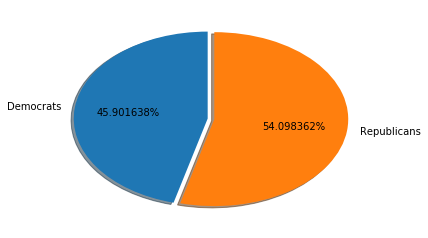

In [11]:
labels = 'Democrats', 'Republicans'
sizes = [28, 33]
explode = (0, 0.05)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct = '%1f%%',
        shadow=True, startangle=90)
plt.show()

In [91]:
#to see the amount of pacs in each state sorted by State
df_member_state = df_member.groupby(['@attributes.state']+['@attributes.party']).size()
print(df_member_state)

@attributes.state  @attributes.party
Alabama            R                    3
Arizona            D                    1
                   R                    2
California         D                    7
                   R                    3
Colorado           R                    2
Connecticut        D                    1
Florida            D                    1
                   R                    1
Georgia            R                    1
Guam               D                    1
Hawaii             D                    2
Indiana            R                    1
Louisiana          R                    1
Maryland           D                    1
Massachusetts      D                    2
Mississippi        R                    1
Missouri           R                    2
Nebraska           R                    1
Nevada             D                    1
New Hampshire      D                    1
New Jersey         D                    1
                   R                   

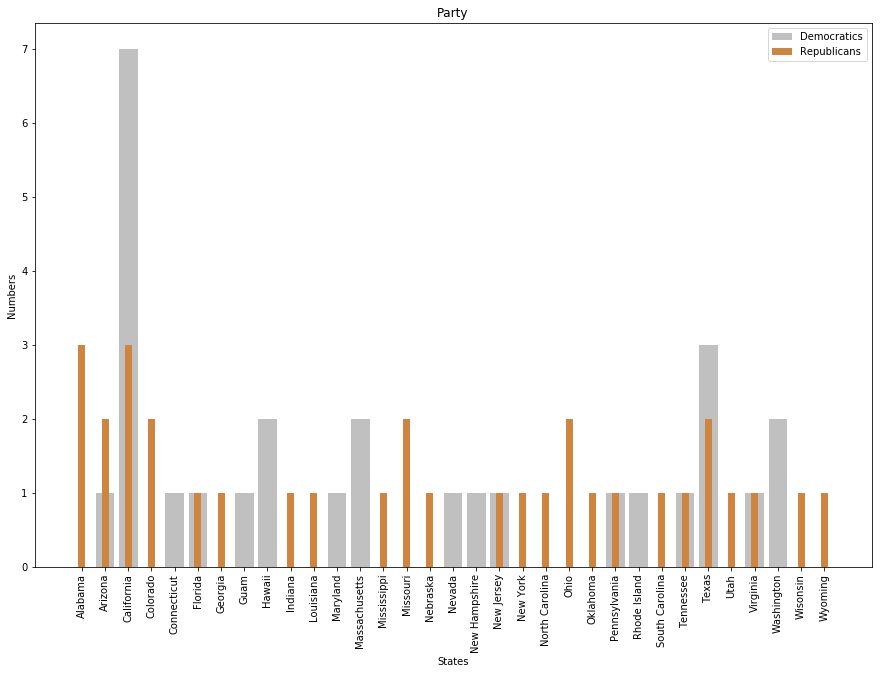

In [13]:
#below is a bar chart illustrating the number of Democrats/Republicans in each State
fig = plt.figure(figsize=(15,10))
states = ['Alabama', 'Arizona', 'California', 'Colorado','Connecticut','Florida','Georgia','Guam','Hawaii','Indiana',
          'Louisiana','Maryland','Massachusetts','Mississippi','Missouri','Nebraska','Nevada','New Hampshire',
          'New Jersey','New York','North Carolina','Ohio','Oklahoma','Pennsylvania','Rhode Island','South Carolina',
          'Tennessee','Texas','Utah','Virginia','Washington','Wisonsin','Wyoming']
Democratics = np.array([0,1,7,0,1,1,0,1,2,0,0,1,2,0,0,0,1,1,1,0,0,0,0,1,1,0,1,3,0,1,2,0,0])
Republicans = np.array([3,2,3,2,0,1,1,0,0,1,1,0,0,1,2,1,0,0,1,1,1,2,1,1,0,1,1,2,1,1,0,1,1])
ind = [x for x, _ in enumerate(states)]

plt.bar(ind, Democratics, width=0.8, label='Democratics', color='silver')
plt.bar(ind, Republicans, width=0.3, label='Republicans', color='#CD853F')

plt.xticks(ind, states, rotation=90)
plt.ylabel("Numbers")
plt.xlabel("States")
plt.legend(loc="best")
plt.title("Party")
plt.ylim=10.0

plt.show()

In [93]:
# to see how many democrats or republicans are there
df_member_supporters = df_member.groupby(['@attributes.party']+['@attributes.total']).size()
print(df_member_supporters)

@attributes.party  @attributes.total
D                  1000                 1
                   1155970              1
                   121606               1
                   146683               1
                   146767               1
                   155264               1
                   156140               1
                   17959                1
                   18260                1
                   20852                1
                   23485                1
                   26                   1
                   27700                1
                   2771                 1
                   29990                1
                   31275                1
                   32153                1
                   33246                1
                   3500                 1
                   36002                1
                   37025                1
                   41652                1
                   48961               

In [164]:
###set up a networkx graph, and add the nodes and categorical variable from the file

import networkx as net
from networkx.algorithms import bipartite
G = nx.DiGraph()
G=nx.from_pandas_edgelist(df_member,source="@attributes.pacs",target="@attributes.party")
print(net.info(G))


Name: 
Type: Graph
Number of nodes: 37
Number of edges: 46
Average degree:   2.4865


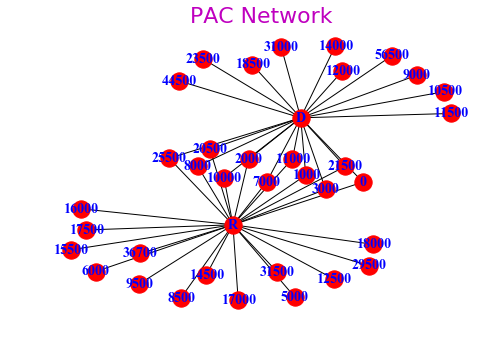

In [165]:
nx.draw(G, labels=None,font_size=14, font_color='b',font_family='times new roman')
plt.title('PAC Network', size=22, color='m')

plt.show()

In [166]:
#compute the degree of every node in the network
deg = net.degree(G)
deg

DegreeView({'0': 2, 'D': 21, '15500': 1, 'R': 25, '1000': 2, '31500': 1, '36700': 1, '23500': 1, '31000': 1, '44500': 1, '56500': 1, '10500': 1, '17500': 1, '14500': 1, '29500': 1, '25500': 2, '12500': 1, '18500': 1, '21500': 2, '8000': 2, '20500': 2, '17000': 1, '16000': 1, '10000': 2, '7000': 2, '6000': 1, '3000': 2, '14000': 1, '11500': 1, '11000': 2, '5000': 1, '12000': 1, '9500': 1, '9000': 1, '18000': 1, '2000': 2, '8500': 1})

In [163]:
#to check if the components of the graph are connected 
net.is_connected(G)

True

In [160]:
#The below result is a dictionary depicting the value of degree centrality of each node. 
G=net.erdos_renyi_graph(100,0.5) 
d=net.degree_centrality(G) 
print(d) 

{0: 0.5252525252525253, 1: 0.4747474747474748, 2: 0.4444444444444445, 3: 0.494949494949495, 4: 0.5555555555555556, 5: 0.5656565656565657, 6: 0.595959595959596, 7: 0.4646464646464647, 8: 0.4747474747474748, 9: 0.5454545454545455, 10: 0.5858585858585859, 11: 0.5454545454545455, 12: 0.4646464646464647, 13: 0.5353535353535354, 14: 0.5050505050505051, 15: 0.4444444444444445, 16: 0.48484848484848486, 17: 0.5353535353535354, 18: 0.5555555555555556, 19: 0.5555555555555556, 20: 0.5252525252525253, 21: 0.4444444444444445, 22: 0.5252525252525253, 23: 0.4646464646464647, 24: 0.6060606060606061, 25: 0.43434343434343436, 26: 0.5555555555555556, 27: 0.4646464646464647, 28: 0.48484848484848486, 29: 0.4747474747474748, 30: 0.4141414141414142, 31: 0.5555555555555556, 32: 0.48484848484848486, 33: 0.4646464646464647, 34: 0.6161616161616162, 35: 0.4545454545454546, 36: 0.5656565656565657, 37: 0.5151515151515152, 38: 0.4747474747474748, 39: 0.4747474747474748, 40: 0.48484848484848486, 41: 0.4444444444444445

In [129]:
G.order()

100

In [167]:
#the size of the graph
G.size()

46

In [115]:
#Betweenness Centrality is another centrality that is based on shortest path between nodes. It is determined as number of the shortest paths passing by the given node. 
#Closeness Centrality is a self-explanatory measure where each node’s importance is determined by closeness to all other nodes. 
import networkx as nx
# Betweenness centrality
dict1= nx.betweenness_centrality(G)

# Closeness centrality
dict2= nx.closeness_centrality(G)

# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)


In [118]:
def highest_centrality(cent_dict):
 """Returns a tuple (node,value) with the node
with largest value from Networkx centrality dictionary."""
 # Create ordered tuple of centrality data
 cent_items=[(b,a) for (a,b) in cent_dict.iteritems()]
# Sort in descending order
 cent_items.sort()
 cent_items.reverse()
 return tuple(reversed(cent_items[0]))


In [138]:
betCent = nx.betweenness_centrality(G, normalized=False, endpoints=True)
sorted(betCent, key=betCent.get, reverse=True)[:10]

[90, 50, 27, 16, 87, 23, 79, 30, 9, 36]

In [139]:
eigCent = nx.eigenvector_centrality_numpy(G)
sorted(eigCent, key=eigCent.get, reverse=True)[:10]


[27, 90, 79, 16, 30, 23, 9, 50, 51, 36]

In [140]:
bw_centrality = nx.betweenness_centrality(G, normalized=False)
pos = nx.spectral_layout(G)

In [141]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    
    # labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

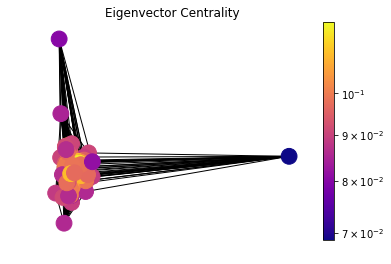

In [142]:
#The Eigenvector approach to measuring closeness uses a factor analytic procedure to discount closeness to small local subnetworks.
draw(G, pos, nx.eigenvector_centrality_numpy(G), 'Eigenvector Centrality')

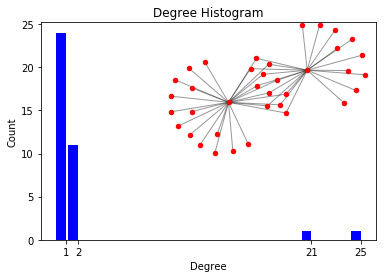

In [168]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

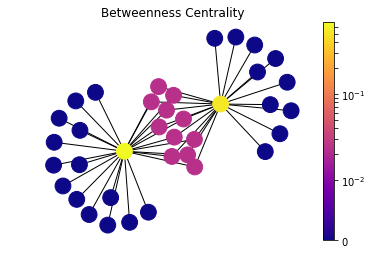

In [169]:
draw(G, pos, nx.betweenness_centrality(G), 'Betweenness Centrality')

# Conclusions 

When we started this project our idea was to find data that included pacs from different sectors/ industries, unfortunately our data reflects only pacs from the Real Estate sector. 
What is interested in this analysis is that some pacs are connected to other pacs who are then distributed between the Reps and Dems. 

In further analysis, we can look into various industries business and then compare their connection to the pacs. 
